In [0]:
%matplotlib inline
import pandas as pd
import os, random, shutil

from keras_preprocessing import image
import matplotlib.pyplot as plt
from google.colab import drive


In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
base_path = r'/content/gdrive/My Drive/kaggle/galaxy/train'

In [0]:
my_data = os.path.join(base_path, 'data')

In [0]:
train_dir = os.path.join(my_data, 'train')
validation_dir = os.path.join(my_data, 'validation')

In [0]:
BS = 32

In [0]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)
validation_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [0]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=BS,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150,150),
                                                         batch_size=BS,
                                                         class_mode='categorical')

Found 8044 images belonging to 3 classes.
Found 3450 images belonging to 3 classes.


MODEL ARCHITECTURE

In [0]:
model = tf.keras.models.Sequential([
    # first convolution layer, input is an 150x150 image x3 colors
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the image pixels
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron fully connected hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model_path = os.path.join(base_path,'model_wts')

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=8044/BS,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=3450/BS,
                              verbose=1)
model.save('/content/gdrive/My Drive/kaggle/galaxy/train/model_wts/myy_model.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
252/251 [==============================] - 2372s 9s/step - loss: 0.6905 - accuracy: 0.6211 - val_loss: 0.5911 - val_accuracy: 0.6907
Epoch 2/15
252/251 [==============================] - 572s 2s/step - loss: 0.5500 - accuracy: 0.7197 - val_loss: 0.5242 - val_accuracy: 0.7467
Epoch 3/15
252/251 [==============================] - 567s 2s/step - loss: 0.4749 - accuracy: 0.7675 - val_loss: 0.4229 - val_accuracy: 0.8165
Epoch 4/15
252/251 [==============================] - 567s 2s/step - loss: 0.4117 - accuracy: 0.8107 - val_loss: 0.4127 - val_accuracy: 0.8142
Epoch 5/15
252/251 [==============================] - 567s 2s/step - loss: 0.3560 - accuracy: 0.8404 - val_loss: 0.3187 - val_accuracy: 0.8568
Epoch 6/15
252/251 [==============================] - 569s 2s/step - loss: 0.3304 - accuracy: 0.8570 - val_loss: 0.2819 - val_accuracy: 0.8826
Epoch 7/15
252/251 [==============================] - 570s 2s/ste

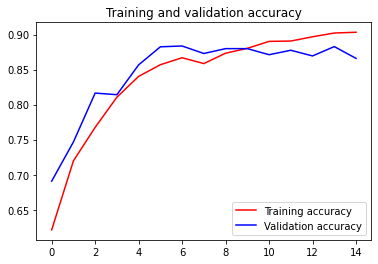

In [0]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

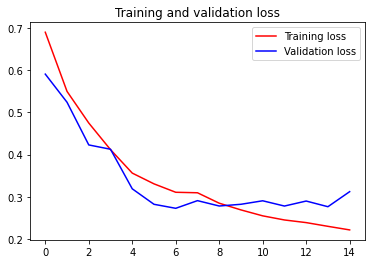

In [0]:
loss      = history.history['loss']
val_loss  = history.history['val_loss']
epochs   = range(len(loss))

plt.plot(epochs, acc, 'r', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

PREDICTIONS/RESULTS

In [0]:
model = tf.keras.models.load_model('/content/gdrive/My Drive/kaggle/galaxy/train/model_wts/myy_model.h5')

elliptical-3.jpg [[0. 0. 1.]]
other-elliptical.jpg [[1. 0. 0.]]
spiral-2.jpg [[0. 0. 1.]]
spiral-1.jpg [[0. 0. 1.]]
other-spiral.jpg [[0.0000000e+00 3.1017213e-09 1.0000000e+00]]
spiral-3.jpg [[0. 0. 1.]]


ValueError: ignored

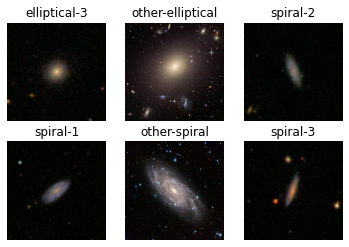

In [0]:
rows = 2
for num, file in enumerate(os.listdir('/content/gdrive/My Drive/kaggle/galaxy/testing')):
    img = image.load_img(os.path.join('/content/gdrive/My Drive/kaggle/galaxy/testing', file) , target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    plt.subplot(rows, 3, num+1)
    plt.title(file.split('.')[0])
    plt.axis('off')
    plt.imshow(img)
    print(file, classes)

[[1. 0. 0.]]


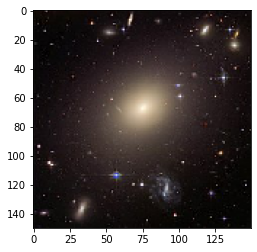

In [0]:
img = image.load_img(os.path.join('/content/gdrive/My Drive/kaggle/galaxy/testing', 'other-elliptical.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[0.0000000e+00 3.1017213e-09 1.0000000e+00]]


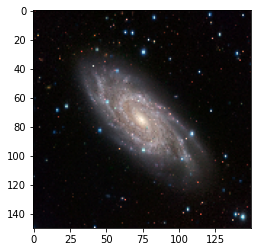

In [0]:
img = image.load_img(os.path.join('/content/gdrive/My Drive/kaggle/galaxy/testing', 'other-spiral.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[0. 0. 1.]]


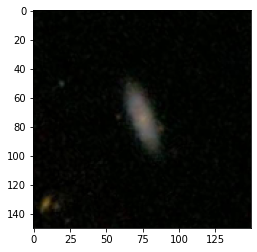

In [0]:
img = image.load_img(os.path.join('/content/gdrive/My Drive/kaggle/galaxy/testing', 'spiral-2.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[0. 0. 1.]]


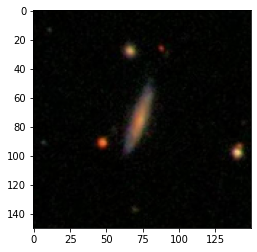

In [0]:
img = image.load_img(os.path.join('/content/gdrive/My Drive/kaggle/galaxy/testing', 'spiral-3.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[1. 0. 0.]]


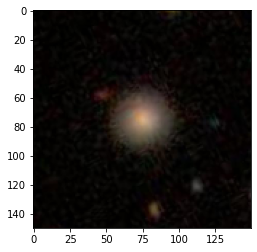

In [0]:
img = image.load_img(os.path.join('/content/gdrive/My Drive/kaggle/galaxy/testing', 'elliptical-1.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[0. 0. 1.]]


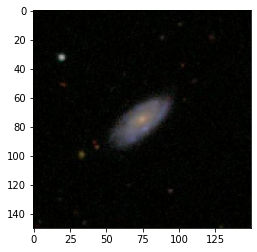

In [0]:
img = image.load_img(os.path.join('/content/gdrive/My Drive/kaggle/galaxy/testing', 'spiral-1.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[1. 0. 0.]]


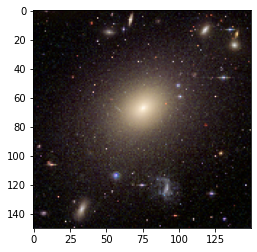

In [0]:
img = image.load_img(os.path.join('/content/gdrive/My Drive/kaggle/galaxy/testing', 'Wiki_elliptical.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[1.1987877e-11 1.0000000e+00 0.0000000e+00]]


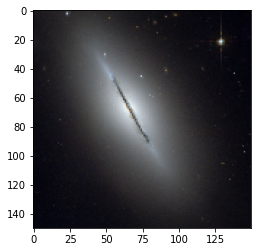

In [0]:
img = image.load_img(os.path.join('/content/gdrive/My Drive/kaggle/galaxy/testing', 'wiki_lenticular.png') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)